In [412]:
import pandas as pd
import codecs
import datetime
import re
from datetime import datetime 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns
from bokeh.plotting import figure, output_file, show

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
%config InlineBackend.figure_format = 'retina'

In [256]:
df = pd.read_csv('./df_acres', low_memory=False, index_col=False)DBSCAN

In [257]:
df.set_index('start_date', inplace=True)

In [258]:
df.isna().sum().sum()

0

In [259]:
to_drop = ['fire_department_name', 'incident_name',
                  'county', 'street_address',
                  'city', 'state', 'zip',
                  'burn_duration', 'cause', 'incident_number',
                 'type_descriptions', 'cross_streets_or_directions_or_national_grid',
                 'containment_date']

In [260]:
df.burn_duration.dtype

dtype('float64')

In [261]:
X = df.drop(columns=to_drop)
y = df['burn_duration']

In [262]:
df = df.loc[df['burn_duration']> .000 ]

In [263]:
df.shape

(41852, 1404)

In [266]:
df = df.loc[df['latitude']> 31 ]
df = df.loc[df['latitude']< 44 ]
df = df.loc[df['longitude']< -111 ]
df = df.loc[df['longitude']> -125]

In [346]:
# sns.scatterplot(
#     x = df['longitude'],
#     y = df['latitude'],
#     hue = df['burn_duration'],
#     palette = 'inferno',
#     markers = False,
#     sizes= (1)
# );

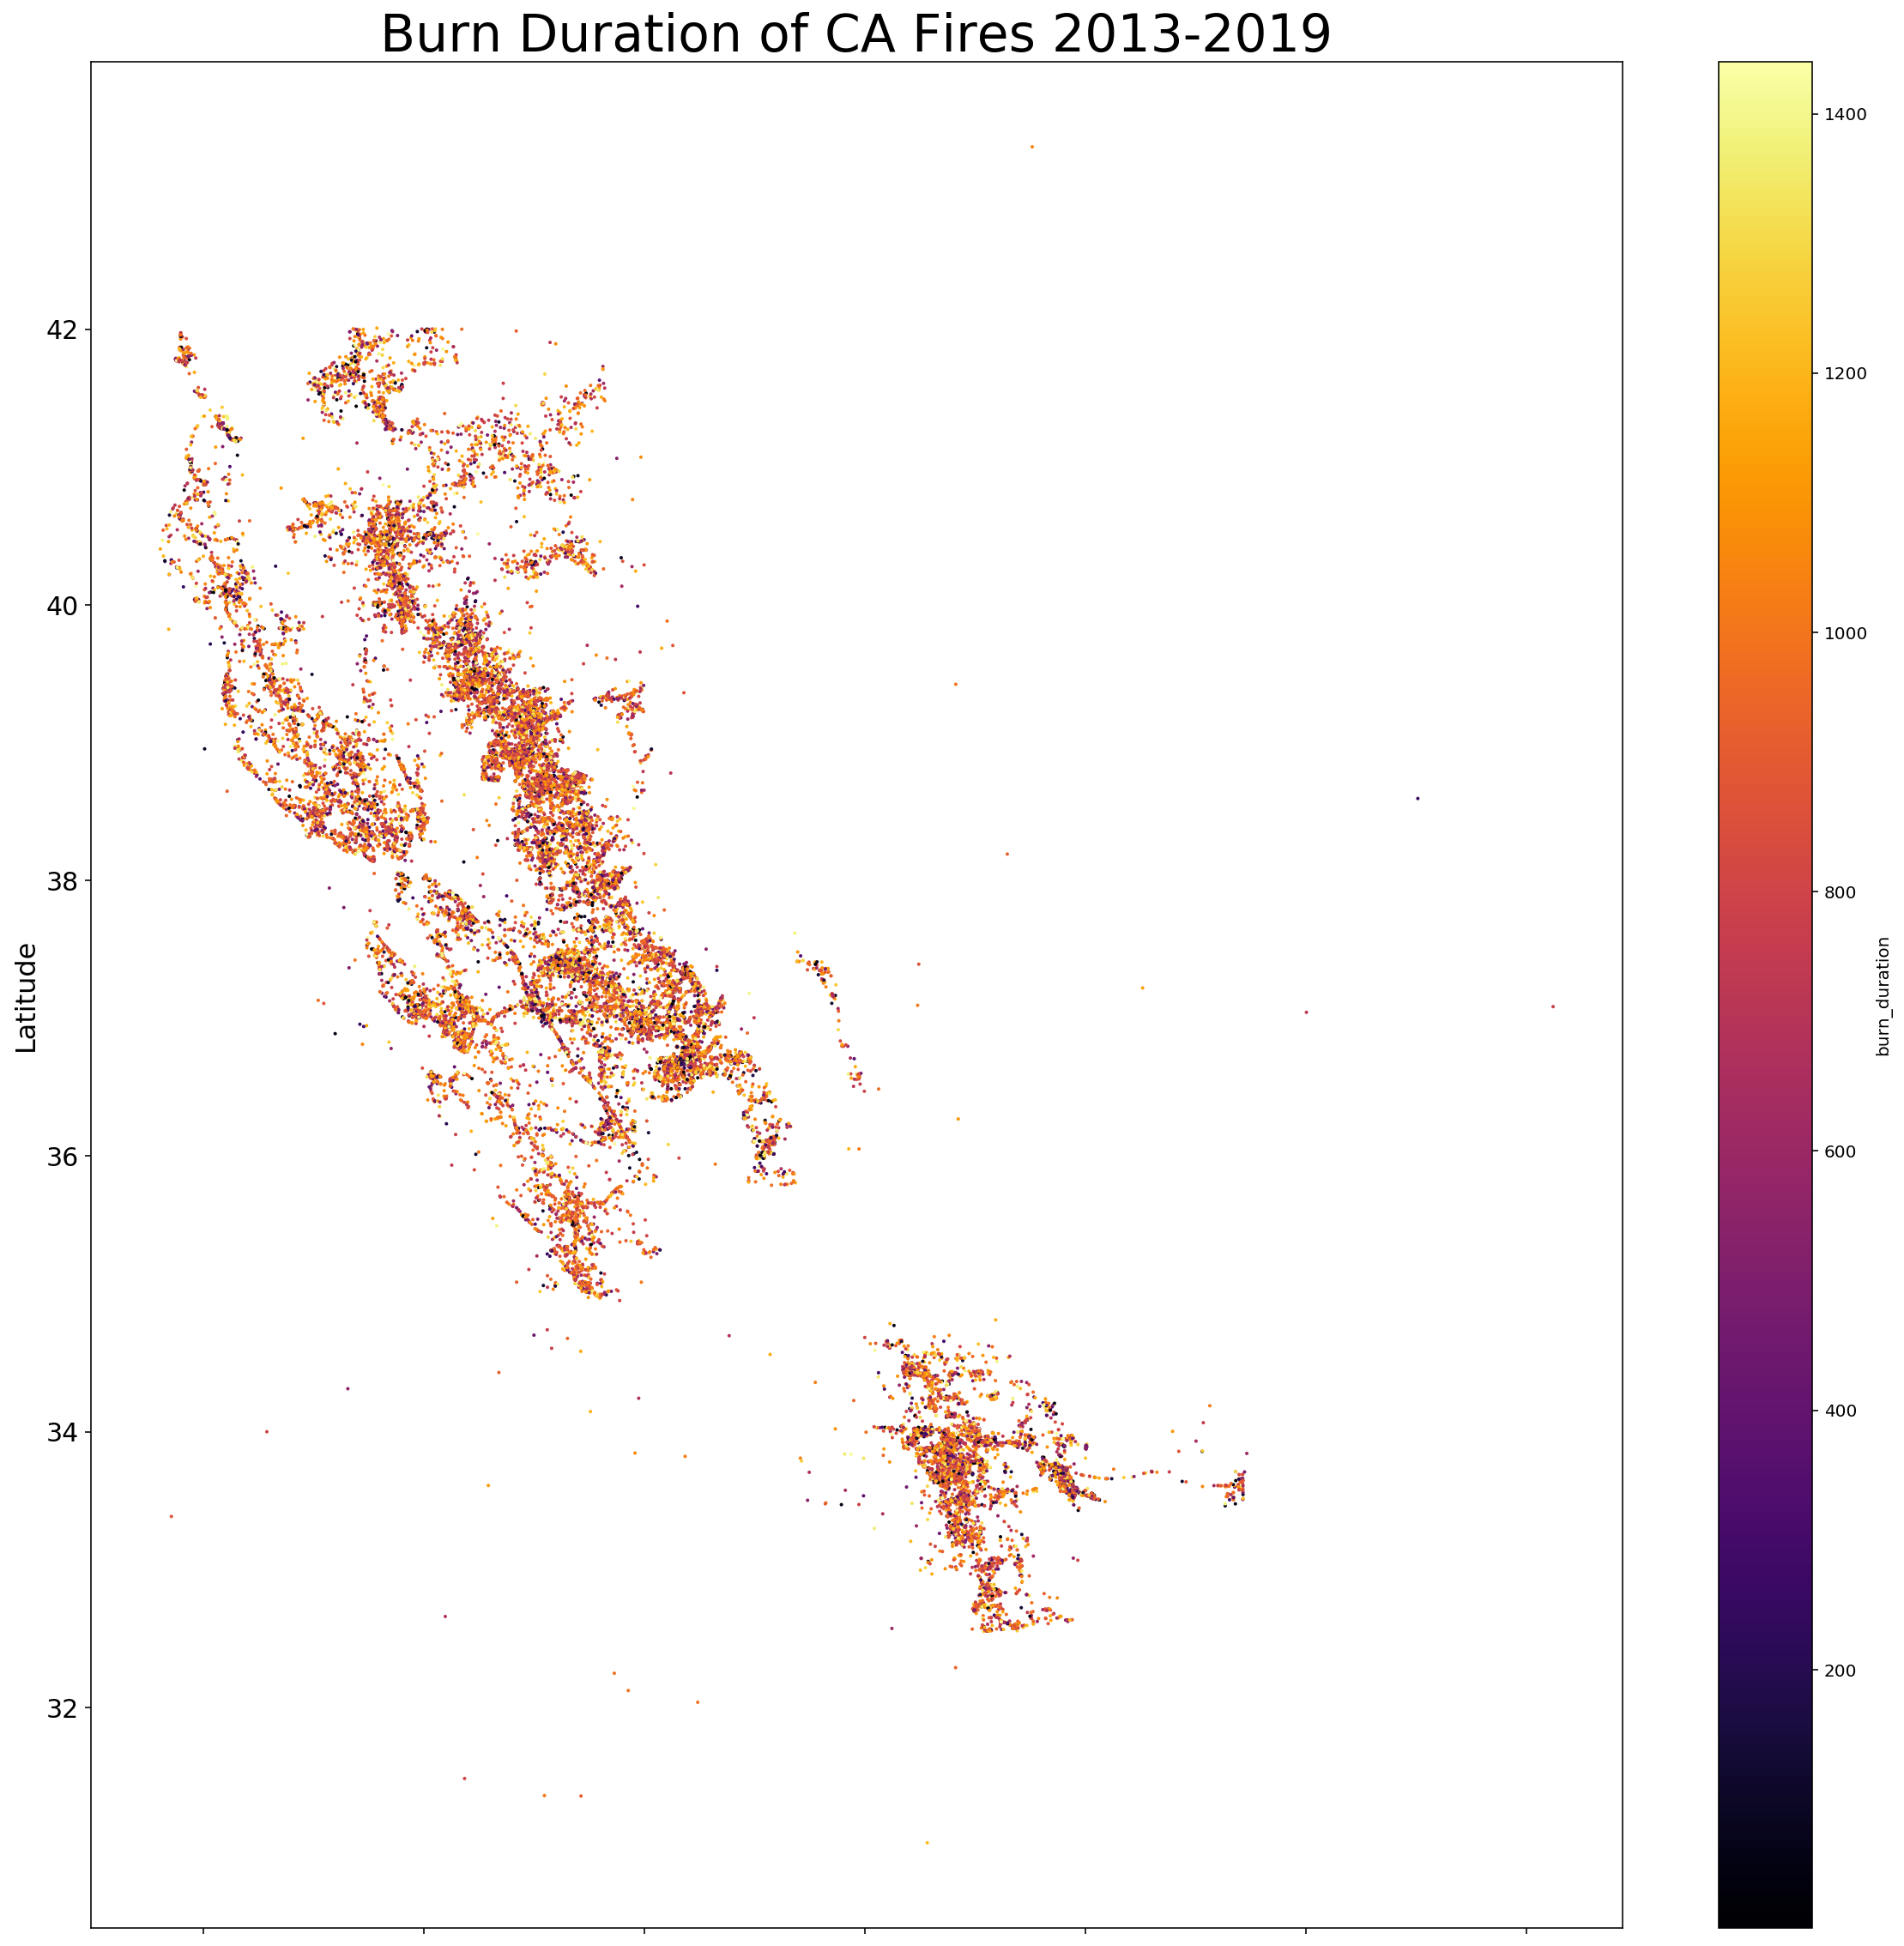

In [347]:
t = 'Burn Duration of CA Fires 2013-2019'

df.plot(kind="scatter",
        x="longitude", use_index= True,fontsize = 15,
        y="latitude",
        c="burn_duration", 
         cmap="inferno",
        
        legend = False,
        figsize=(20, 20), s=1);
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize = 16)
# plt.clabel('Burn Time in Minutes')
plt.title(t, fontsize=30);
# plt.xticks(list(range(df['longitude'])), df['longitude'].index, fontsize=12)

In [268]:
df.shape

(31777, 1404)

In [269]:
# df = df.loc[df['total_acres_burned']<.5]

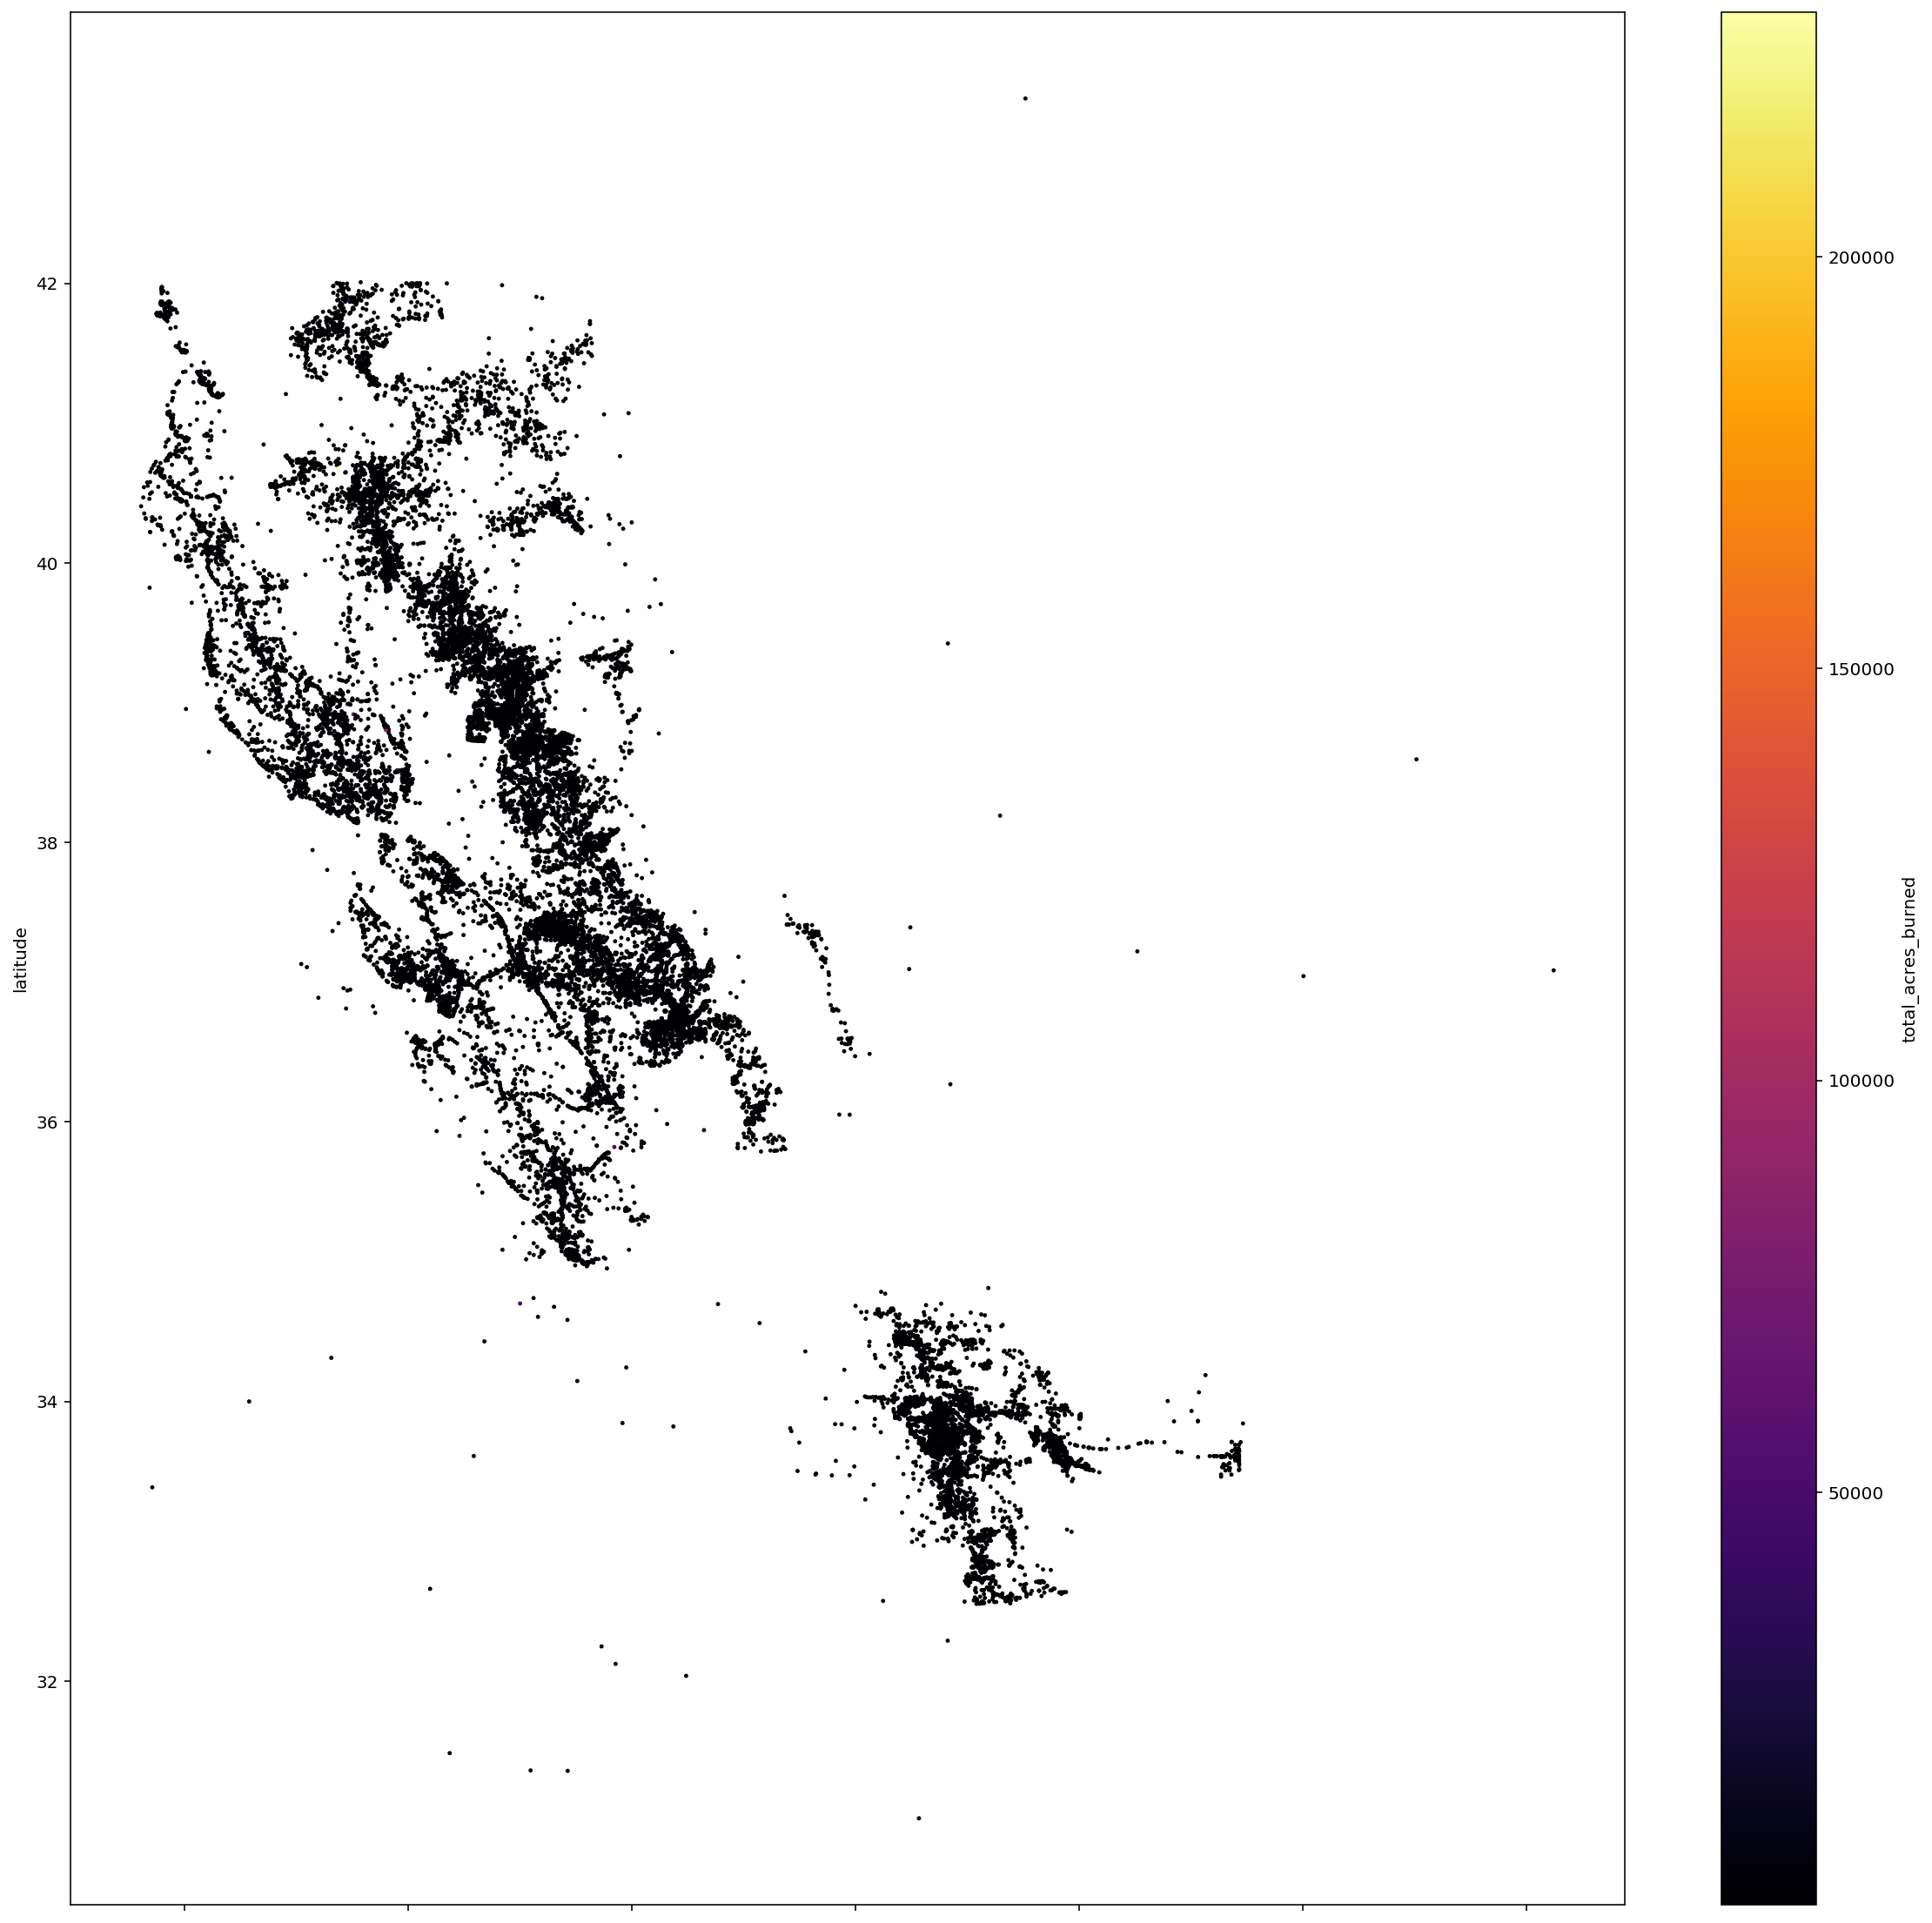

In [270]:
df.plot(kind="scatter", x="longitude", y="latitude", c="total_acres_burned",
         cmap="inferno",  figsize=(20, 20), s=2);

In [253]:
df.type_descriptions.value_counts()

    Grass fire, includes fire confined to area    8521
    Brush, or brush and grass mixture fire        3937
    Natural vegetation fire, other                3243
    Forest, woods, or wildland fire               2692
    Unauthorized burning                           668
    Cultivated trees or nursery stock fire          98
    Cultivated vegetation, crop fire, other         84
    Cultivated orchard or vineyard fire             75
    Cultivated grain or crop fire                   65
Name: type_descriptions, dtype: int64

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", c="",
         cmap="inferno",  figsize=(20, 20), s=2);

In [284]:
string_columns = ['fire_department_name', 'incident_name',
                  'county', 'street_address',
                  'city', 'state', 'zip',
                  'burn_duration', 'cause', 'incident_number',
                 'type_descriptions', 'cross_streets_or_directions_or_national_grid',
                 'containment_date']

In [372]:
X = df.drop(columns= string_columns)
y = df.burn_duration

X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), random_state=42, test_size=0.5
)

In [318]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [319]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.013968069054652199
-0.007311510755307228


In [373]:
geo = df[['longitude', 'latitude']]
geo.head()

,longitude,latitude
start_date,,
2013-01-01 00:00:00,-117.286983,33.840233
2013-01-01 00:00:00,-116.127000,33.964933
2013-01-05 00:00:00,-117.523467,34.446983
2013-01-05 00:00:00,-119.353167,37.043217
2013-01-05 00:00:00,-117.252050,33.589333


In [349]:
# pipe = Pipeline([
#     ('sc', StandardScaler()),
#     ('pc', PCA()),
#     ('lr', LogisticRegression(penalty='none', solver='lbfgs', random_state=42)),
    
# ])

In [348]:
# pipe.get_params()

In [312]:
kf = KFold(n_splits=5, shuffle=True, random_state=17)

In [313]:
# gs.best_params_

NameError: name 'gs' is not defined

In [396]:
db_model = DBSCAN(eps = .02, min_samples=4)
db_model.fit(geo)

DBSCAN(algorithm='auto', eps=0.02, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [397]:
# db_model.fit(X_train, y_train)

## Pipeline

In [ ]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('pc', PCA()),
    ('lr', LinearRegression()),
    
])

In [ ]:
pgrid = {
    'pc__n_components':np.arange(1, 201, 10)
}

gs = GridSearchCV(pipe, pgrid, cv=kf, scoring='accuracy', return_train_score=False, n_jobs=2)

gs.fit(X_train, y_train)

In [ ]:
grid = GridSearchCV(pipe, param_grid=parameteres, cv=5)

## /Pipeline

In [398]:
# km = KMeans(n_clusters=1000)
# km.fit(geo)

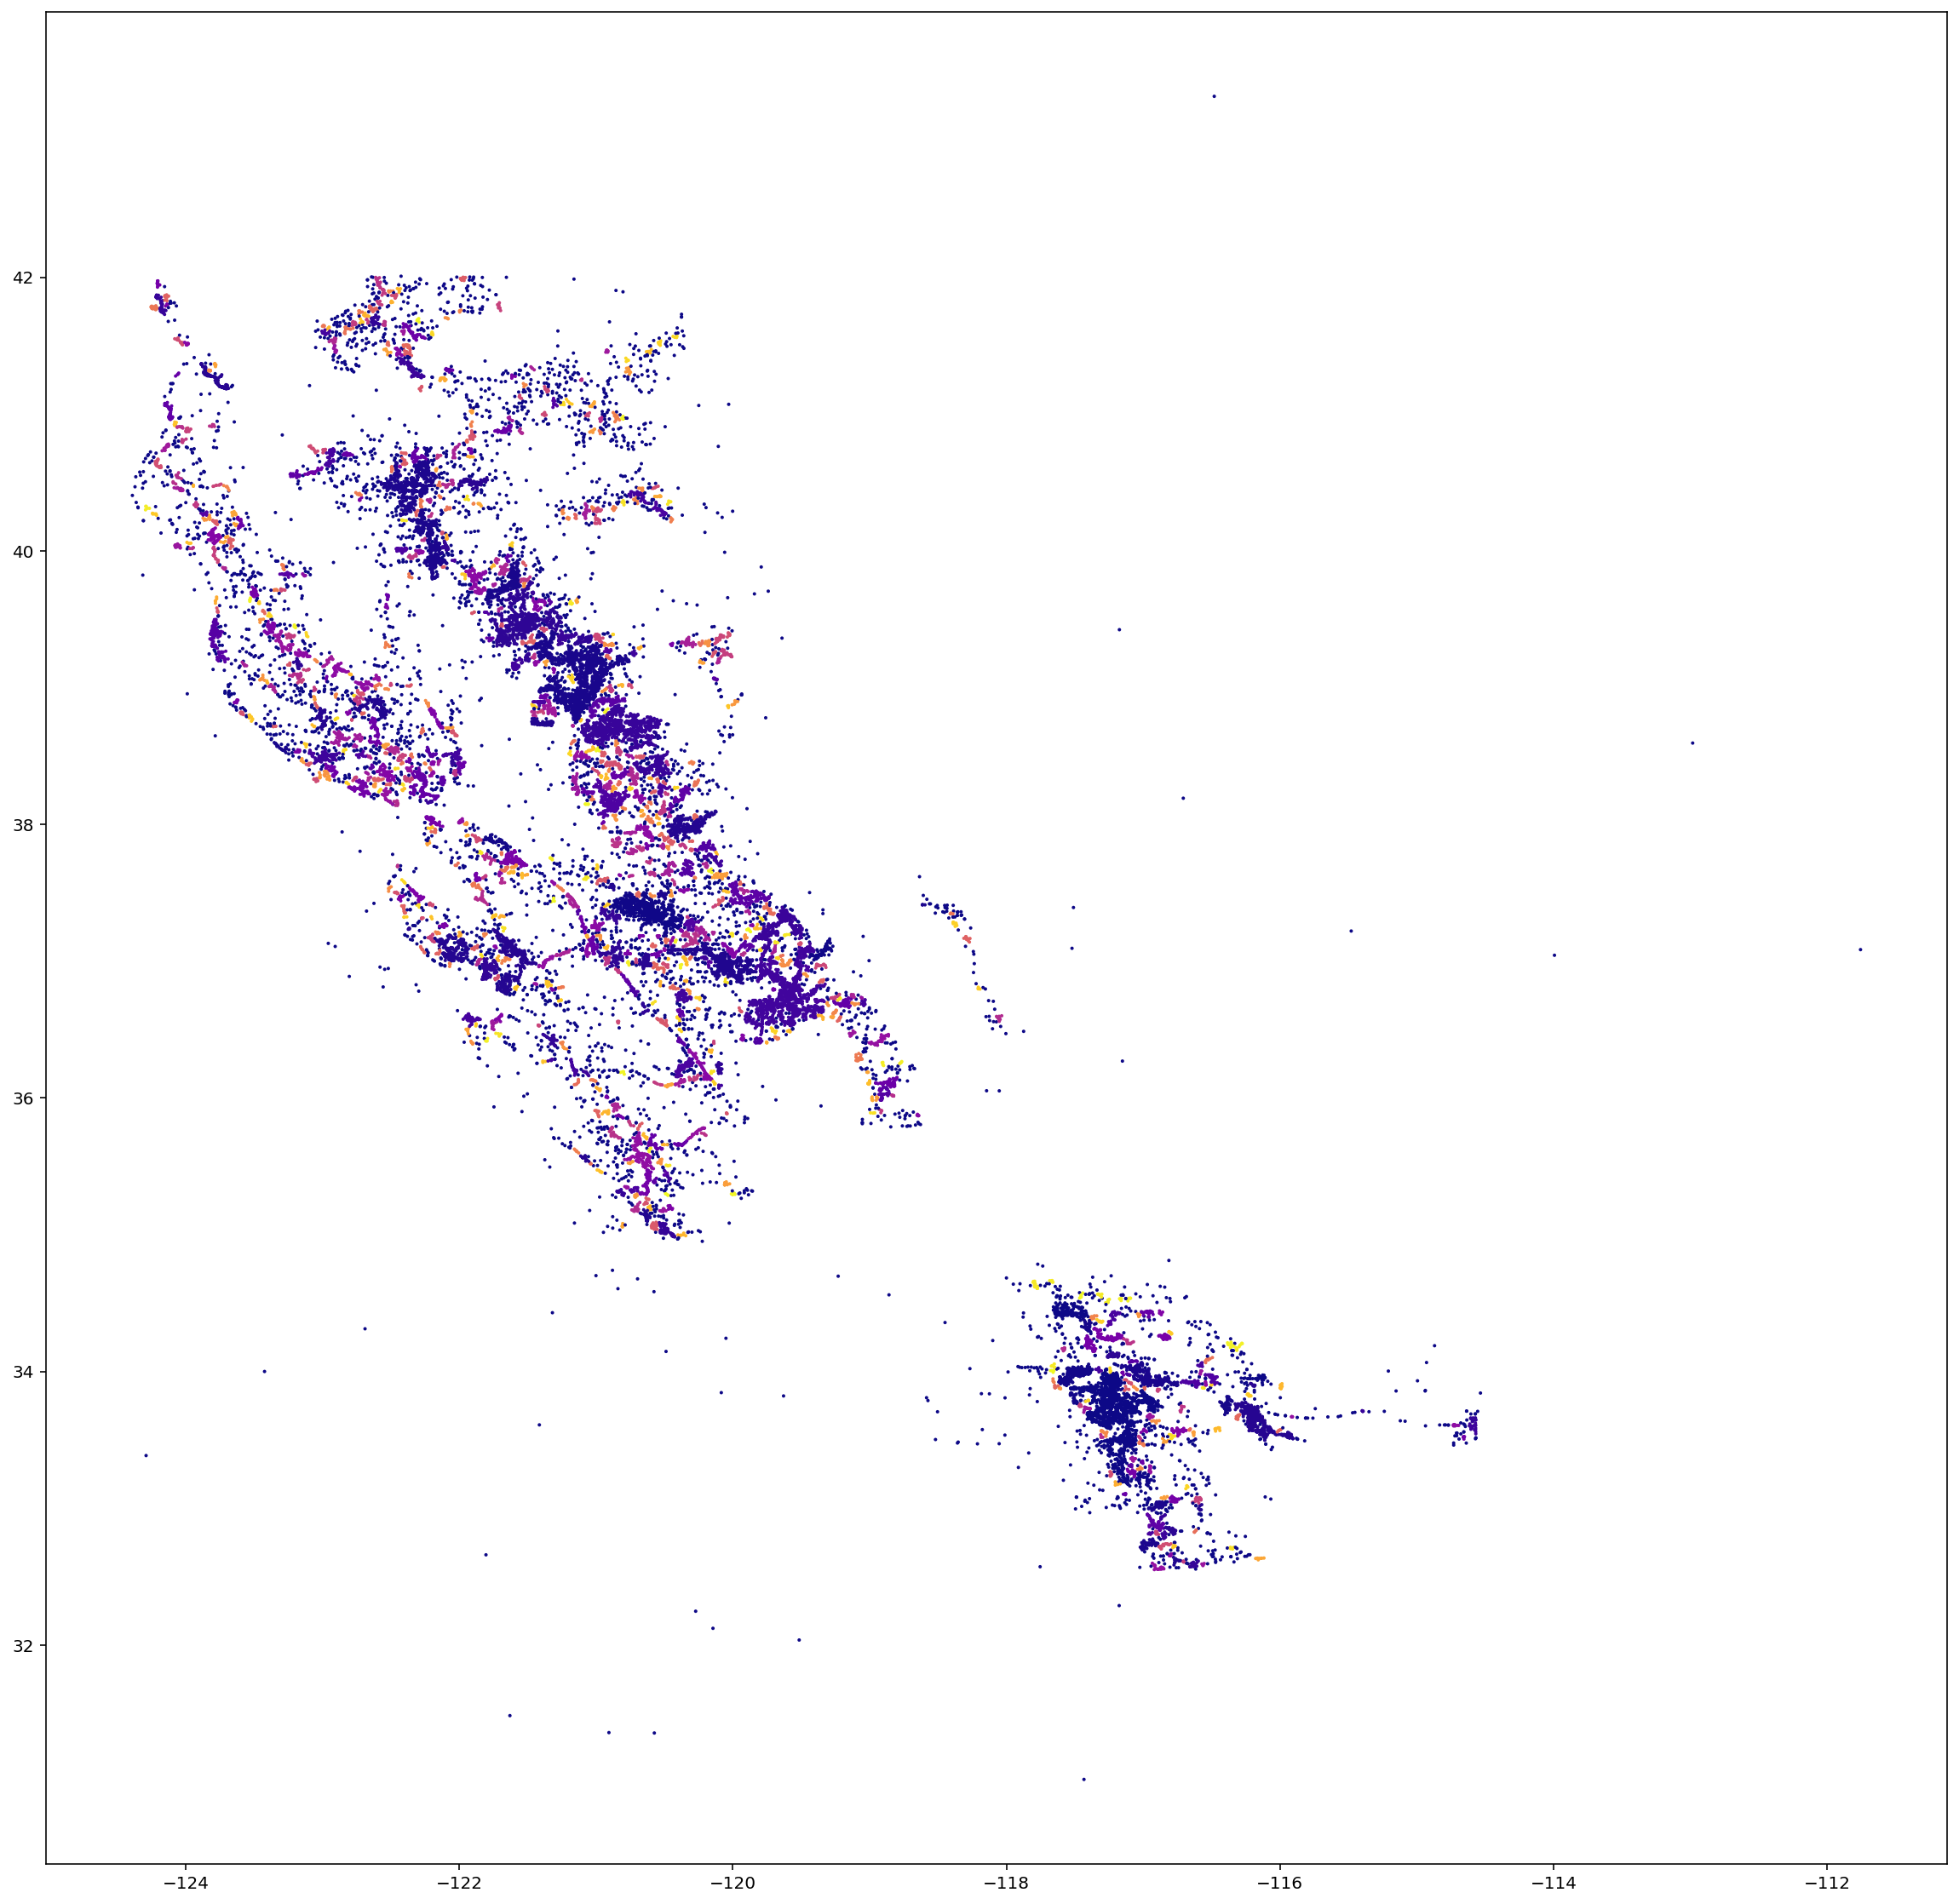

In [399]:
plt.figure(figsize=(20, 20))
plt.scatter(df['longitude'], df['latitude'], c=db_model.labels_, s=1, cmap="plasma");

In [400]:
len(set(db_model.labels_))

897

In [401]:
X['cluster'] = db_model.labels_
X = pd.get_dummies(columns=['cluster'], data=X, drop_first=True)

In [364]:
# X['cluster'] = km.labels_
# X = pd.get_dummies(columns=['cluster'], data=X, drop_first=True)


In [408]:
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), random_state=42, test_size=0.5, shuffle = False
)

In [409]:
model20 = LinearRegression()
model20.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [410]:
print(model20.score(X_train, y_train))
print(model20.score(X_test, y_test))

0.07753338197509696
-13484.738367088523


In [336]:
def transfer_tune(X, y, k):
    location_data = df[["longitude", "latitude"]]
    km = KMeans(n_clusters=k)
    km.fit(location_data)
    X.loc[:, "cluster"] = km.predict(location_data)
    X_dummy = pd.get_dummies(columns=["cluster"], data=X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42, test_size=0.5
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    print(f"{k} : {r2}")

In [ ]:
for k in range(2800, 3100, 50):
    transfer_tune(X, y, k)

In [344]:
for k in range(2000, 3000, 100):
    transfer_tune(X, y, k)

2000 : -0.12147990983252079
2100 : -0.127802427442546
2200 : -4148436.5551800705
2300 : -0.162202695615715
2400 : -0.16013209693546693
2500 : -0.17494237616373343
2600 : -0.1748065618664172
2700 : -1459504.3326410225


KeyboardInterrupt: 

In [ ]:
oh = OneHotEncoder(categories="auto", sparse=False)
oh.fit(km.labels_.reshape(-1, 1))

In [ ]:
dummy_matrix = oh.transform(km.labels_.reshape(-1, 1))

In [ ]:
oh.transform(X_test)